# What is an image? - Images as NumPy arrays

This page will examine the fundamental representation of images as NumPy arrays.

Let's think about the meaning of the word "image".  The *intuitive meaning* is roughly "a picture of something", or perhaps more broadly a "visual representation of something". This is the familiar meaning which applies to images we encounter in everyday life, like advertisement posters, paintings, drawings, photographs etc.

The *technical meaning* of image - in scientific computing - is *an at least two dimensional array*. Depending on your background and familiarity with the topic, this definition may sound more or less strange. We assure you that each meaning is consistent with the other. However, each meaning refers to different, but overlapping, sets of things. 

Let's clarify the relationship between the two meanings of "image". Imagine an image - in the intuitive sense - printed on a piece of paper. The image has two dimensions, one dimensions runs along the *length* of the paper and one runs along *width* of the paper. Now imagine the *computer file* that was used to print the image onto the paper (e.g. the image file that was sent to a run-of-the-mill printer to produce the printed image). 

The computer file must contain information which tells the printer what to put where along each dimension of the piece of paper - for instance should that location contain black, white, grey or a colour? By controlling these things, the information contained in the file will ultimately determine the look of the printed image (what it is a picture *of* etc.). 

The file and resulting printed image might depict an object that was neither originally created on a computer. The image may be of a hand painting, for instance. Things like hand paintings fall under the intuitive meaning of "image", but, until they are represented on a computer, they do not fall under the technical meaning of "image". A hand painting is not an array of numbers, but the computer file which represents it is.

Because the intuitive definition of "image" includes things like hand paintings, hand drawings etc. which do not inherently involve computer representations, the intuitive definition refers to some objects which are not captured by the technical meaning. The technical meaning of "image" refers to the computer representations of these things (e.g. a scan or photograph of a hand painting), as well as to other inherently digital images like digital photographs, CT sans, MRI scans etc (more on these [later](2_skimage_intro).

Normally, we take an image (in the intutive sense) and *then* represent it on a computer (by photographing or scanning it etc.). This can be referred to as *digitizing* an image. When digitizing, we take an image in the intuitive sense and convert it to an image in the technical sense, by representing it as an at least two-dimensional array of numbers. 

To get a deeper understanding of the computer representation of images, let's do things the other way around to the normal procedure: let's create an image (in the technical sense of a two-dimensional array) and then view it as an image (in the intuitive sense) as a visual representation that we can look at as we would any picture.

# The simplest images

First, we will import some Python libraries. 

In [1]:
# Library imports.
import numpy as np
import matplotlib.pyplot as plt

Let's create a two-dimensional array using the familiar Numpy syntax. We specify the `dtype` as, for reasons we will discuss later, when dealing with images it is best to manually control the `dtype` we use, rather than letting NumPy decide:

In [2]:
# A two-dimensional numpy array of 1's and 0's.
two_D_ones_and_zeros = np.array([[1, 0,], 
                                 [0, 1,]],
                                 dtype=float)

two_D_ones_and_zeros

array([[1., 0.],
       [0., 1.]])

Look at the output of the cell above. This is how Numpy shows us the contents of the array. For the rest of these tutorial pages, we will refer to this as the "raw" view of the array e.g. the default view that we see when we inspect the contents of the array without any fancy visualisation.

This array is small enough that we can easily see it's dimensionality. If we so wish, we can also use the `.shape` attribute to confirm the dimensions:

In [3]:
# The `.shape` attribute
two_D_ones_and_zeros.shape

(2, 2)

As you know, the output of the cell above means that the `two_d_ones_and_zeros` array has 2 rows and 2 columns.In virtue of having two dimensions, **this array is an image in the technical sense**. In fact, we will use the terms "array", "image" and "image array" interchangably throughout this tutorial series (where we are referring to arrays of two-dimensions or more).

You may (understandably) be thinking "that array does not look much like an image...". How can we view it as an image in the intuitive sense - as a picture we can look at? One way is to use `plt.matshow()`, a function from the [Matplotlib library](https://matplotlib.org). The function name `plt.matshow()` stands for `mat`rix `show`. This function has this name because arrays are a representation of [matrices](https://en.wikipedia.org/wiki/Matrix_(mathematics)). As the name implies, it will display a a two-dimensional array graphically.

Let's see how our `two_D_ones_and_zeros` looks when we pass it as an argument to `plt.matshow()`. We will use `plt.axis()` to keep the axes clear of numbers for now, to keep things uncluttered:

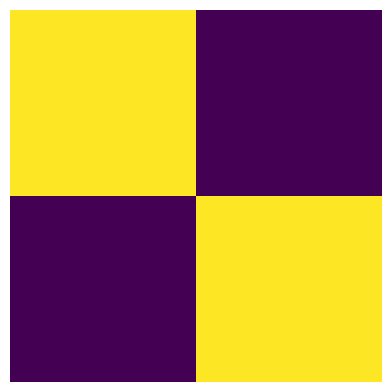

In [4]:
# Show the array using `plt.matshow()`.
plt.matshow(two_D_ones_and_zeros)
plt.axis('off');

Well, now it certainly is an image in the intuitive sense, albeit a strange one! Let's break down what we see here.

Each element of the array is shown as a coloured square. The exact colour of the square is determined by the number at the corresponding element of the array. Compare the "raw" array to the plot above - you'll see that the yellow squares correspond to 1's in the original array, and the blue squares correspond to 0's.

In [5]:
# Show the array ("raw" Numpy output).
two_D_ones_and_zeros

array([[1., 0.],
       [0., 1.]])

We will now create the same visualization, but will allow Matplotlib to show us the default axis ticks, as we will not use `plt.xticks([])` and `plt.yticks([])` to clear the axes of the plot:

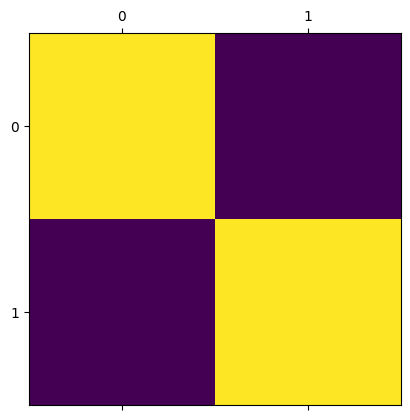

In [6]:
# Show the array via `plt.matshow()`
plt.matshow(two_D_ones_and_zeros);

We can see the numbers 0 and 1 on the axes. These numbers refer to the the integer index location of each element. For instance, the element in the top left corner is at row/column coordinate (0, 0), the element in the top right corner is at (0, 1) and so on:

In [7]:
# Get the element in the top left (0, 0) location
two_D_ones_and_zeros[0, 0]

np.float64(1.0)

In [8]:
# Get the element in the top right (0, 1) location
two_D_ones_and_zeros[0, 1]

np.float64(0.0)

Also notice that for now we are dealing with an `float64` `dtype`. You will find other `dtypes` in image arrays, and this can have big implications for how the image is displayed by Matplotlib. For now we will just deal with these `float64` numbers, and we will return to the topic of `dtype`s [later in the tutorial series](1_colour_images_as_numpy_arrays).

# Pixels, pixel coordinates and interpolation

So far we have seen that each element in the image array controls what will be seen in each square of the image displayed by `plt.matshow()`. We can refer to each element in our image array as a *pixel*. This is an abbreviation of *picture element*. An image array, then, is a collection of pixels. 

Our image contains as many pixels as there are elements in the array. Since our image array contains 4 elements, it therefore has 4 pixels. Each pixel has either a 1 or a 0 value, in the `float64` `dtype`. This type of image, because it contains only two unique values, is called a *binary image*. When this array is displayed by `plt.matshow()`, by default, 1's are shown as yellow squares and 0's are shown as a blue squares.

It is important to distinguish between what we will call *array pixels* and *display pixels*. *Array pixels* are the pixel values in the image, considered as a two-dimensional array of numbers. However, the screen you are reading this tutorial on has a certain number of tiny "dots" which can be coloured in different ways. The image you see on the screen is determined by the precise configuration and colouring of these dots. These dots are also called "pixels", and becuase they are involved in final display of image arrays, we will refer to them as *display pixels*. 

When we *display*, *visualise* or *render* an array image, our computer interprets our *array pixels* and then shows them as *display pixels*. *Display*, *visualise* and *render* are synonyms here for the process of taking an image (in the technical sense of an two-dimensional array) and showing it as graphically, as an image in the intuitive sense of a picture we can view, using a visualisation tool like Matplotlib.

Astute readers might reasonably say "hang on! If *display pixels* are tiny dots on my screen, then the image from `plt.matshow()` looks bigger than four pixels". This is correct. Matplotlib is drawing an image with many more pixels on your display screen than the array has values. Our image array contains 4 *array pixels*, but if Matplotlib displayed it with just 4 *display pixels*, the resulting visualisation would be tiny and impossible to view on whatever device you are reading this tutorial on.

Thus, when our small (or *low-resolution*) image array is displayed/visualised on your screen by something like `plt.matshow()` the image array may be shown using a different, larger number of *display pixels* to the number of *array pixels* contained in the image array. What Matplotlib is doing here, behind the scenes, is something called *image interpolation*. This is defined as ["a technique by which a low-resolution image can be scaled up to a high-resolution image without degrading the visual quality"](https://www.sciencedirect.com/topics/computer-science/image-interpolation#:~:text=Image%20interpolation%20is%20a%20technique,without%20degrading%20the%20visual%20quality.).

How does Matplotlib know what to show in the new, upscaled display pixels? It uses the original array pixels as a guide, to estimate what should go in the new display pixels, to give a good, albeit upscaled, representation of the information in the original image array. We will [go into more detail about this later in this tutorial series](3_skimage_processing_from_numpy_and_scipy).

To give a glimpse of what has happened behind the scenes we will save the *displayed image* to a new `.png` file, using `plt.savefig()`. We have saved the file in the following path in the directory this notebook is in: `images/two_D_ones_and_zeros_from_plot.png`.

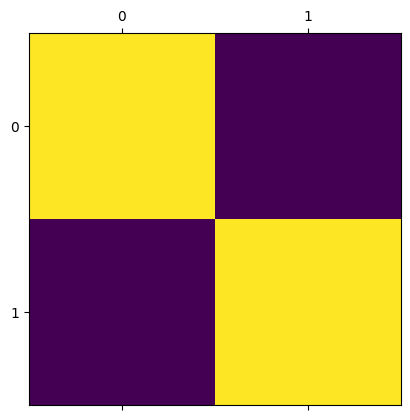

In [9]:
# Show the image.
plt.matshow(two_D_ones_and_zeros)

# Save the image.
plt.savefig("images/two_D_ones_and_zeros_from_plot.png")

We will then read this new `.png` image back into this notebook, and convert it to a numpy array to view it's `shape` attribute.

Reading files using Scikit-image (`skimage`) will be covered on [later pages](2_skimage_intro), but for now we import`.imread()` from the input/output (`io`) module of Scikit-image to load the image that we just saved via the code in the cell above.

*Note*: for reasons that will become clear later, we set the `as_gray` argument to `True` to ensure the image has the same number of dimensions as our original array.

In [10]:
from skimage import io

# Read in the image from the file we just saved.
from_file = io.imread("images/two_D_ones_and_zeros_from_plot.png", 
                      as_gray=True)

# Show the shape of the image file.
from_file.shape

(480, 480)

You can see that the image we have saved and loaded back has a `shape` of `(480, 480)`. This is much larger than our original `(4, 4)` image array. We displayed our original 2-by-2 *array image* (`two_D_ones_and_zeros`) using Matplotlib, creating a *display image*. It is this display image that we saved using `plt.savefig()`, and the display image contains many more pixels than the original `two_d_ones_and_zeros` array.

::: {note}

**More on array pixels vs display pixels**

We have used `plt.matshow()` so far on this page. Perhaps more commonly, you will see another Matplotlib function used to visualise/display/render image arrays. This more commonly seen function is called `plt.imshow()` (for `im`age `show`). It is a more general purpose function than `plt.matshow()` and can be used to display a wider variety of image arrays. See the documentation for each function [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html) and [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

Using the (more common) `plt.imshow()` can lead to some different and potentially slightly confusing default axis tick labels, for very small (e.g. low-resolution) image arrays:

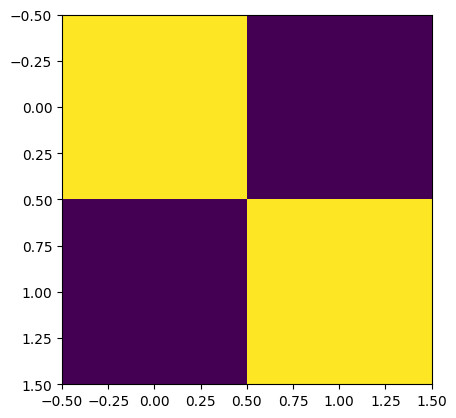

In [11]:
# Visualize our array with `plt.imshow()`
plt.imshow(two_D_ones_and_zeros);

When using `plt.imshow()` we now see some (possibly confusing) information on the axes. The `plt.matshow()` function, by default shows us the integer index of each element in the array. For the new display output from `plt.imshow()` we see axis tick labels ranging from -0.5 to 1.5.

These numbers refer to the *display pixel coordinates* of the displayed image, rather than the *array pixel coordinates* that `plt.matshow()` puts on the axis by default. Compare the output from the cell below (from `plt.matshow()`) to the output of the cell above (from `plt.imshow()`) to see the difference:

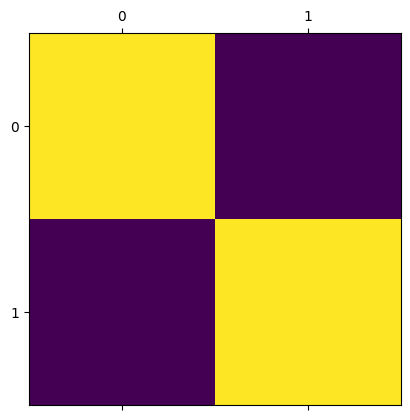

In [12]:
# Use `plt.matshow()` - the axis ticks now show the array pixel coordinates
# which are the integer indexes of each value in the image array
plt.matshow(two_D_ones_and_zeros);

For the rest of this tutorial, for small arrays we will use `plt.matshow()`, for very small arrays, to keep the axes labels more intuitively interpretable.

:::

# Shades of grey and colourmaps

Why does our image array display in vibrant purple and yellow, you may ask? This is because both `plt.matshow()` - and it's cousin `plt.imshow()` - have a default *colourmap*. This is a mapping between the numbers in the array, and the colours that the plot will depict each number with when the array is visualised. The default colourmap is called [`viridis`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.viridis.html). This default colourmap maps low array pixel values to purple, and high array pixel values to yellow.

We can adjust the colour by changing the `cmap` argument of `plt.matshow()` - for instance, we can change the plot to visualise the array using a greyscale map:

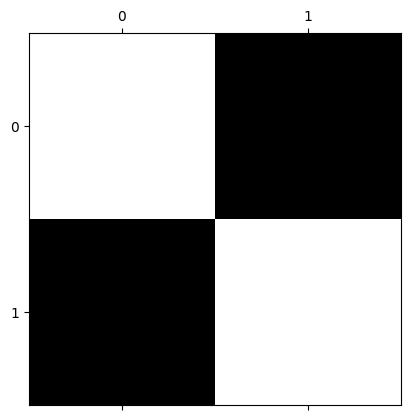

In [13]:
# Show the array, change the colourmap.
plt.matshow(two_D_ones_and_zeros, 
            cmap="gray"); # Specify the colourmap

So far so good. We have hand-crafted an image of something which looks like a very small chessboard. Using the `gray` colourmap, each number in the array is now mapped to a shade between black and white. We can call this the *grey-level* of each element. This is a technical term, and may seem a bit odd given that the image shows only black or white squares. This helpful image makes things clearer:

![](images/grey-colours.png)
(Image from [here](https://www.pythoninformer.com/computer-science/colour/grey-colour)).

Personally, we think a better term here would be "white-level", but the term "grey-level" is already established...

So far, our image array contains only 1's and 0's; you might naturally ask "what happens if we use other numbers, how does this affect the colour/grey-level"? To investigate this, in the cell below, we create a new two-dimensional array which contains decimal numbers 0 and 1.

In [14]:
# A two dimensional numpy array of numbers between 0 and 1.
two_D_other_numbers= np.array([[0,  1], 
                               [0.5, 0.3]])

two_D_other_numbers

array([[0. , 1. ],
       [0.5, 0.3]])

These numbers are again of the `float64` `dtype`:

In [15]:
# Show the `dtype`.
two_D_other_numbers.dtype

dtype('float64')

Let's show this image using the greyscale colourmap:

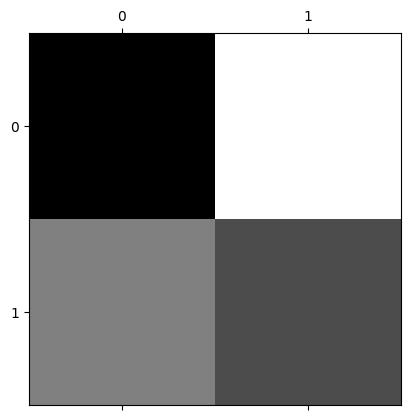

In [16]:
# Show the new array (using Matplotlib).
plt.matshow(two_D_other_numbers,
           cmap="gray");

You can compare this visualisation of the image to the "raw" array output from the cell below. You'll notice that *larger* numbers are represented with *lighter* squares, and *smaller* numbers are represented with *darker* sqaures. When we are using `float64` data, as we are here, you can think of each pixel value (0, 1 or in between) as speciying the grey-level as a percentage (with 1 being 100%, 0 being 0% and 0.5 being 50% etc):

In [17]:
# Show the new array (from the Numpy output).
two_D_other_numbers

array([[0. , 1. ],
       [0.5, 0.3]])

This "larger numbers as lighter shades, lower numbers as darker shades" principle will also apply if we use larger integer numbers:

In [18]:
# Make 'em bigger!
two_D_other_numbers_bigger = two_D_other_numbers * 100
two_D_other_numbers_bigger

array([[  0., 100.],
       [ 50.,  30.]])

Using larger numbers, the *maximum* number will be coloured lightest, and the *minimum* number will be coloured darkest:

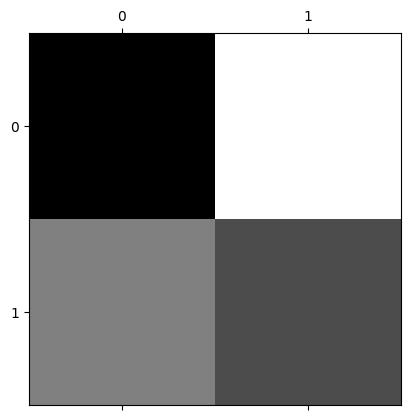

In [19]:
# Visualise the array containing the larger numbers.
plt.matshow(two_D_other_numbers_bigger,
            cmap="gray");

We can make the colour mapping more explicit and interpretable by using the [`plt.colorbar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) function:

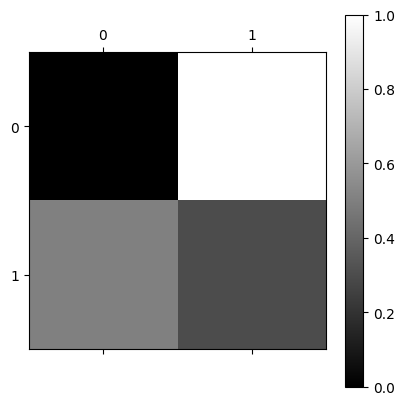

In [20]:
# Add a colourbar.
plt.matshow(two_D_other_numbers,
          cmap="gray")
plt.colorbar(); # Show a helpful colourbar.

The colourbar on the right of the image now shows us which number in the array - which *array pixel* - is mapped to which shade on the rendered image (which, remember, contains many more *display pixels* than there are values in the image array).

Importantly, both our image arrays contain only *one numeric value per array pixel*. For each colourmap (`viridis` vs `gray`) each numeric value maps to a darker or lighter display colour. Lower values map to purple and higher values map to yellow for `viridis`;  lower values map to black and higher values map to white for `gray`. Let's view the plots side-by-side with each colourmap, for comparison:

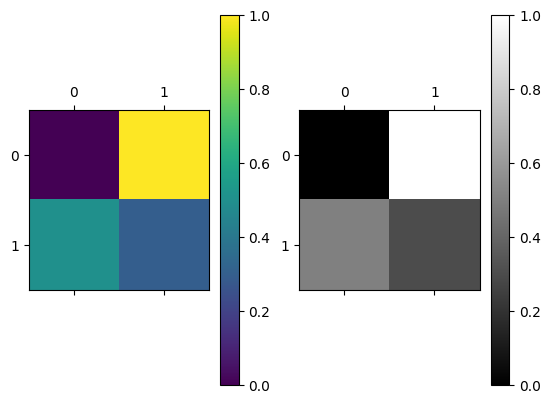

In [21]:
# Show the plots side-by-side.
plt.subplot(1, 2, 1) # Creat the first subplot.
plt.matshow(two_D_other_numbers,
            fignum=0) # This is needed to allow `matshow` to work as a subplot.
plt.colorbar() # Show the colourbar.
plt.subplot(1, 2, 2) # Repeat the above for the second subplot.
plt.matshow(two_D_other_numbers,
            fignum=0,
            cmap='gray')
plt.colorbar();

We will talk more about colour in the [next tutorial](1_colour_images_as_numpy_arrays). For now, you can think of these plots as showing the same array pixel information. The single numeric value in each array pixel location determines *pixel intensity* - e.g. the brightness or darkness with which that pixel will be displayed when the image is rendered (by something like Matplotlib). The `viridis` colourmap maps these pixel intensities to a gradient of purple-yellow; the `gray` colourmap maps these pixel intensities to a gradient of black-grey-white.

We can change the default colourmap for the rest of the plots we create in this session by using the code in the cell below. See [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html) for more information on how to change Matplotlib's default behaviour across every session.

In [22]:
# Set 'gray' as the default colormap
plt.rcParams['image.cmap'] = 'gray'

You now understand the fundamentals of the computer representation of images! An image is array of numbers - often but not necessarily containing information about, or depicting, something in the world. Each element of the array (e.g. each number/array pixel) determines the pixel intensity of that pixel and tells the computer what *colour or grey-level* to show at that location when the image is displayed - e.g. when the image is visualised using display pixels on the screen of your device. 

# (Slightly) more complex images

Let's dive deeper by using some new two-dimensional image arrays with more complex array pixel arrangements. First, we make an array with 15 rows and 8 columns. **Please inspect the contents of the array carefully!**:

In [23]:
# Another array.
mostly_blank_canvas = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 1, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0]],
                                dtype=float)
mostly_blank_canvas

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
# Show the shape.
mostly_blank_canvas.shape

(15, 8)

In [25]:
# Show the `dtype`.
mostly_blank_canvas.dtype

dtype('float64')

From looking at the "raw" array (from the NumPy output of the cell above the last), what do you think this array will look like when we visualise it with `plt.imshow()`? There is a clue in the variable name...

*Note:* this array is now large enough that we get interpretable index labels with `plt.imshow()` e.g. labels which show the integer index location of each array pixel.

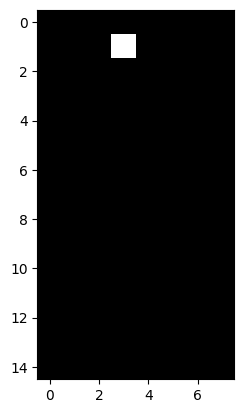

In [26]:
# Show the newest array.
plt.imshow(mostly_blank_canvas);

As you probably expected, the image is mostly of a uniform colour, aside from the single element which contains a 1 rather than a 0.

You can see that this is an image in the intuitive sense. It is a *picture* by a loose definition, though arguably it does not *represent* anything.

What about the array below? What do you think this will show when we visualise it? Try to make your prediction from looking at the "raw" numbers:

In [27]:
what_is_it = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0]],
                       dtype=float)
what_is_it

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

Let's see how good your prediction was:

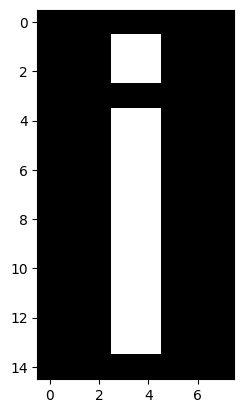

In [28]:
# Show the array.
plt.imshow(what_is_it);

We hope you agree that this image is a pretty good representation of the English letter "i". We now have an image which represents a *symbol* e.g. as opposed to representing a visual scene or object. For any image, which is to say on any array of at least two dimensions, we can do something called *image manipulation*. This might sound like we are deceiving someone about our appearance or character, but in fact what it means is that we *do something which changes the numbers inside the array, and therefore changes the corresponding visual image*.

Let's use the helpfully named Numpy function [`np.flip()`](https://numpy.org/doc/2.1/reference/generated/numpy.flip.html). This function, by default, will "flip" an array along the rows. Somehwat biblically, the first row will become the last row, and the last row will become the first row. Let's apply this function to our present image, and inspect the corresponding "raw" output:

In [29]:
# Flip the array.
flipped_array = np.flip(what_is_it)

# Show the flipped array.
flipped_array

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

What do you think the array now depicts? How will it look when we visualise it with `plt.imshow()`?

Let's take a look:

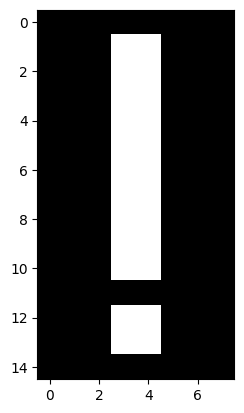

In [30]:
# Show the flipped array graphically.
plt.imshow(flipped_array);

We hope you'll agree that the image now better represents the exclamation mark symbol ("!") than the English letter "i". This change was achieved through altering the location of the numbers in the image array. 

Applying changes such as these to the numbers in the array is the fundamental mechanism of *image processing* - which can be defined as:

![](images/processing_definition.png)

So, remember this maxim: *"image processing" is when we do something which changes the numbers inside the image array, and therefore change the corresponding visual image*.

Such image processing operations are carried out by popular software, including that used to edit images for various social media platforms. They are also carried out in a scientific context in fields like medical imaging, where they are applied to the image arrays we get from CT scans and MRI scans, for example.

Now we know what an image is and how we can manipulate it, let's recap where we are:

* We know that an image (in the technical sense) is a numeric array of at least two dimensions.

* We know that the number at each element of the array tells a computer what pixel intensity (e.g. grey-level) to show at that array pixel location.

* We have seen how changing the elements in an array can change what the image shows or depicts.

* We know what happens when an image array contains fewer pixels than the rendered image e.g. using interpolation, the image will be upscaled to be displayed using more *display pixels* than there are *array pixels* in the original image array.

# Simple images, complex images

The principles seen above apply both to the very small, low-resolution images we looked at, but also to more complex images. The cell below loads in a picture of a Xenomorph (a creature from the [Alien film franchise](https://en.wikipedia.org/wiki/Alien_(franchise))). The image is show via `plt.imshow()`:

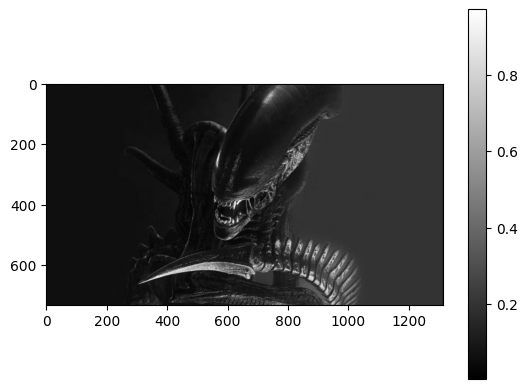

In [31]:
# Load in and `imshow` the image, with a colourbar.
xeno = io.imread("images/xenomorph.PNG", 
                 as_gray=True)
plt.imshow(xeno)
plt.colorbar();

Scary stuff. This image will seem slightly less intimidating when we see that it is, in fact, nothing by a 2-D NumPy array of pixel intensity values. We promise it cannot hurt you:

In [32]:
# Show the NumPy "raw" view of the `xeno` array
xeno.round(2) # We round the numbers for display, to make them nicer to view.

array([[0.06, 0.06, 0.06, ..., 0.2 , 0.2 , 0.05],
       [0.06, 0.06, 0.06, ..., 0.2 , 0.2 , 0.05],
       [0.06, 0.06, 0.06, ..., 0.2 , 0.2 , 0.05],
       ...,
       [0.06, 0.06, 0.06, ..., 0.2 , 0.2 , 0.05],
       [0.06, 0.06, 0.06, ..., 0.2 , 0.2 , 0.05],
       [0.06, 0.06, 0.06, ..., 0.2 , 0.2 , 0.05]], shape=(732, 1313))

These same princples apply to images of any complexity, including those produced by complex scanners like [functional brain imaging](https://en.wikipedia.org/wiki/Functional_neuroimaging) devices.

::: {exercise-start}
:label: you-are-an-artist
:class: dropdown
:::
 
Now over to you to create some [computer art](https://en.wikipedia.org/wiki/Computer_art). Your job is to recreate the (slightly terrifying) image in the output of the cell below, **using only a Numpy array and `plt.matshow()`.** Run the cell to show the image.

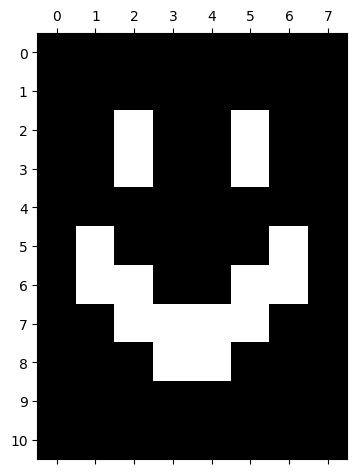

In [33]:
# Importing a custom function to create the image.
from smiley import create_smiley

# Create and show the image.
create_smiley();

The array you create should have `.shape` of (11, 8) - so 11 rows and 8 columns.

*Hint*: you can use your knowledge from the previous sections, coupled with the helpful numbers on each axis of the image - which show the integer index location of each cell in the two-dimensional array - to work out what numbers need to be at each location in your array. You may also want to investigate placing [`plt.grid()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html) in the last line of the cell above and re-running the cell, in order to make it easier to identify row/column coordinates...

In [34]:
# YOUR CODE HERE
...

::: {exercise-end}
:::

::: {solution-start} you-are-an-artist
:class: dropdown
:::

You only need an array of 1's and 0's to create this image. From looking at the numbers on the axes of the plot in the output of the cell above, you can see that "eyes" need to begin on the 3rd row, and the corners of the mouth need to begin on the 6th row, and so on. Likewise the column locations can be read from the vertical axis. Here is the array which will exactly recreate the image:

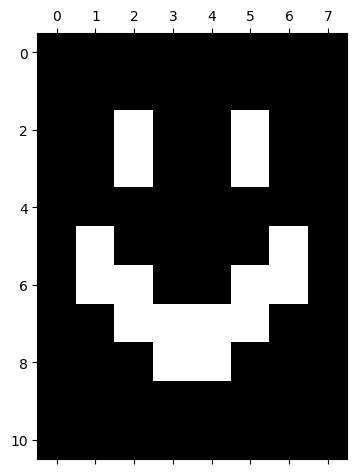

In [35]:
# The image array.
smiley = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 1, 0],
                   [0, 1, 1, 0, 0, 1, 1, 0],
                   [0, 0, 1, 1, 1, 1, 0, 0],
                   [0, 0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0]],
                   dtype=float)

# Display the array.
plt.matshow(smiley);

Run the cell below to show the exact integer index locations of the 1's (all other locations should be 0's).

In [36]:
# Print the (row, column) coordinates of the array pixels with the value "1"
print("Row/column coordinates of 1's in the `smiley` array:")
for val_1, val_2 in zip(np.where(smiley)[0], np.where(smiley)[1]):
    print(f"({val_1}, {val_2})")

Row/column coordinates of 1's in the `smiley` array:
(2, 2)
(2, 5)
(3, 2)
(3, 5)
(5, 1)
(5, 6)
(6, 1)
(6, 2)
(6, 5)
(6, 6)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(8, 3)
(8, 4)


::: {solution-end}
:::

# Summary

On this page we have examined the fundamental components of computer images:

* Images are (at least) two-dimensional arrays of numbers.

* For small/low-resolution arrays, the values in the array will be displayed on more pixels than there are values in the array.

* The number at each location in an image array determines the pixel intensity (grey-level) in a 2-D array.

* These principles apply both to very simple and very complex images.

On the [next page](1_colour_images_as_numpy_arrays), we will look at the representation of colour in NumPy image arrays.

# References

Adapted from: https://lectures.scientific-python.org/advanced/image_processing

Adapted from: https://lectures.scientific-python.org/packages/scikit-image/index.html 

**Reference**: inspiration from Nipraxis also re: arrays/images.

**Reference**: inspiration from `skimage` tutorials

**Reference**: https://bic-berkeley.github.io/psych-214-fall-2016/arrays_and_images.html